# Assignment-1
## Problem Description:
### With the given hospital dataset, the patients length of stay in a hospital needs to be predicted which helps to provide timely care to the patients with high resource utilization.
## Importing the needed packages for solving this problem.


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report

## Loading training dataset to Python Notebook:
### As the ID and HealthServiceArea fields are just attributes, the fields are dropped during the initialization.

In [51]:
patients_df = pd.read_csv('train_data.csv', sep=',', squeeze=True, encoding='ISO-8859-1', keep_default_na =True)
patients_df.drop(['ID', 'HealthServiceArea'], axis=1, inplace=True)
patients_df.head(5)


,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


### The dataset consists of 59966 data with 14 features.

In [52]:
patients_df.shape

(59966, 14)

### From the info command, it can be seen that,
* #### The dataset consists of 14 features with types object and integer.
* #### There are no columns with null values.

In [53]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

### From the describe() command it has identified that the features 'APRSeverityOfIllnessCode' and 'LengthOfStay' are Categorical data. 
* #### 'APRSeverityOfIllnessCode' - with range of [1,2,3,4]
* #### 'LengthOfStay' - with range of [1-10]

In [54]:
patients_df.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


### Identifying and understanding the categorical variables, by using 'value_counts()' command. The categorical features are as follows,
* #### Gender
* #### Race
* #### CCSProcedureCode
* #### APRSeverityOfIllnessCode
* #### PaymentTypology
* #### EmergencyDepartmentIndicator
* #### LengthOfStay

In [55]:
patients_df.Gender.value_counts()

M    30978
F    28987
U        1
Name: Gender, dtype: int64

In [56]:
patients_df.Race.value_counts()

White                     32943
Other Race                18314
Black/African American     8183
Multi-racial                526
Name: Race, dtype: int64

In [57]:
patients_df.CCSProcedureCode.value_counts()

 228    19886
 115    13628
 0      11189
 220    10773
 231     2981
-1        769
 216      740
Name: CCSProcedureCode, dtype: int64

In [58]:
patients_df.APRSeverityOfIllnessCode.value_counts()

1    47953
2     8760
3     3252
4        1
Name: APRSeverityOfIllnessCode, dtype: int64

In [59]:
patients_df.PaymentTypology.value_counts()

Medicaid                     28723
Private Health Insurance     15608
Blue Cross/Blue Shield       12073
Self-Pay                      1984
Federal/State/Local/VA         849
Managed Care, Unspecified      545
Miscellaneous/Other            118
Medicare                        44
Unknown                         22
Name: PaymentTypology, dtype: int64

In [60]:
patients_df.EmergencyDepartmentIndicator.value_counts()

N    59453
Y      513
Name: EmergencyDepartmentIndicator, dtype: int64

In [61]:
patients_df.LengthOfStay.value_counts()

2     25000
3     16000
1      8895
4      7504
5      1342
6       557
7       346
8       145
9        97
10       80
Name: LengthOfStay, dtype: int64

### One of the project requirement is to convert the target variable's ('LengthOfStay') categories into 0 & 1.
#### if the 'LengthOfStay' < 4, then it is 0
#### if the 'LengthOfStay' >= 4, then it is 1

In [14]:
patients_df.loc[patients_df['LengthOfStay'] < 4, 'LengthOfStay'] = 0
patients_df.loc[patients_df['LengthOfStay'] >= 4, 'LengthOfStay'] = 1
patients_df.LengthOfStay.value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

## Exploratory Data Analysis (EDA):

### Histogram Observation:
* #### Attributes Gender, Race, TypeOfAdmission, PaymentTypology, APRSeverityOfIllnessCode, EmergencyDepartmentIndicator and LengthOfStay are categorical variables.
* #### Gender attribute has 3 variables, M, F & U. U variable has only few instances.
* #### Race attribute has 4 variables, where Multi-racial has only few intances.
* #### TypeOfAdmission has 4 variables, only Newborn has large number of instances.
* #### EmergencyDepartmentIndicator has 2 variables, where Y has only few instances.
* #### APRSeverityOfIllnessCode has 4 variables, only category 1 has large number of instances.
* #### LengthOfStay has 2 variables, where 1 has only few instances.
* #### Most of the attributes are heavily skewed, Eg: BirthWeight, PaymentTypology, AverageCostInFacility, AverageIncomeInZipCode, AverageCostinCounty.
* #### Target variable 'LengthOfStay' is heavily imbalanced.

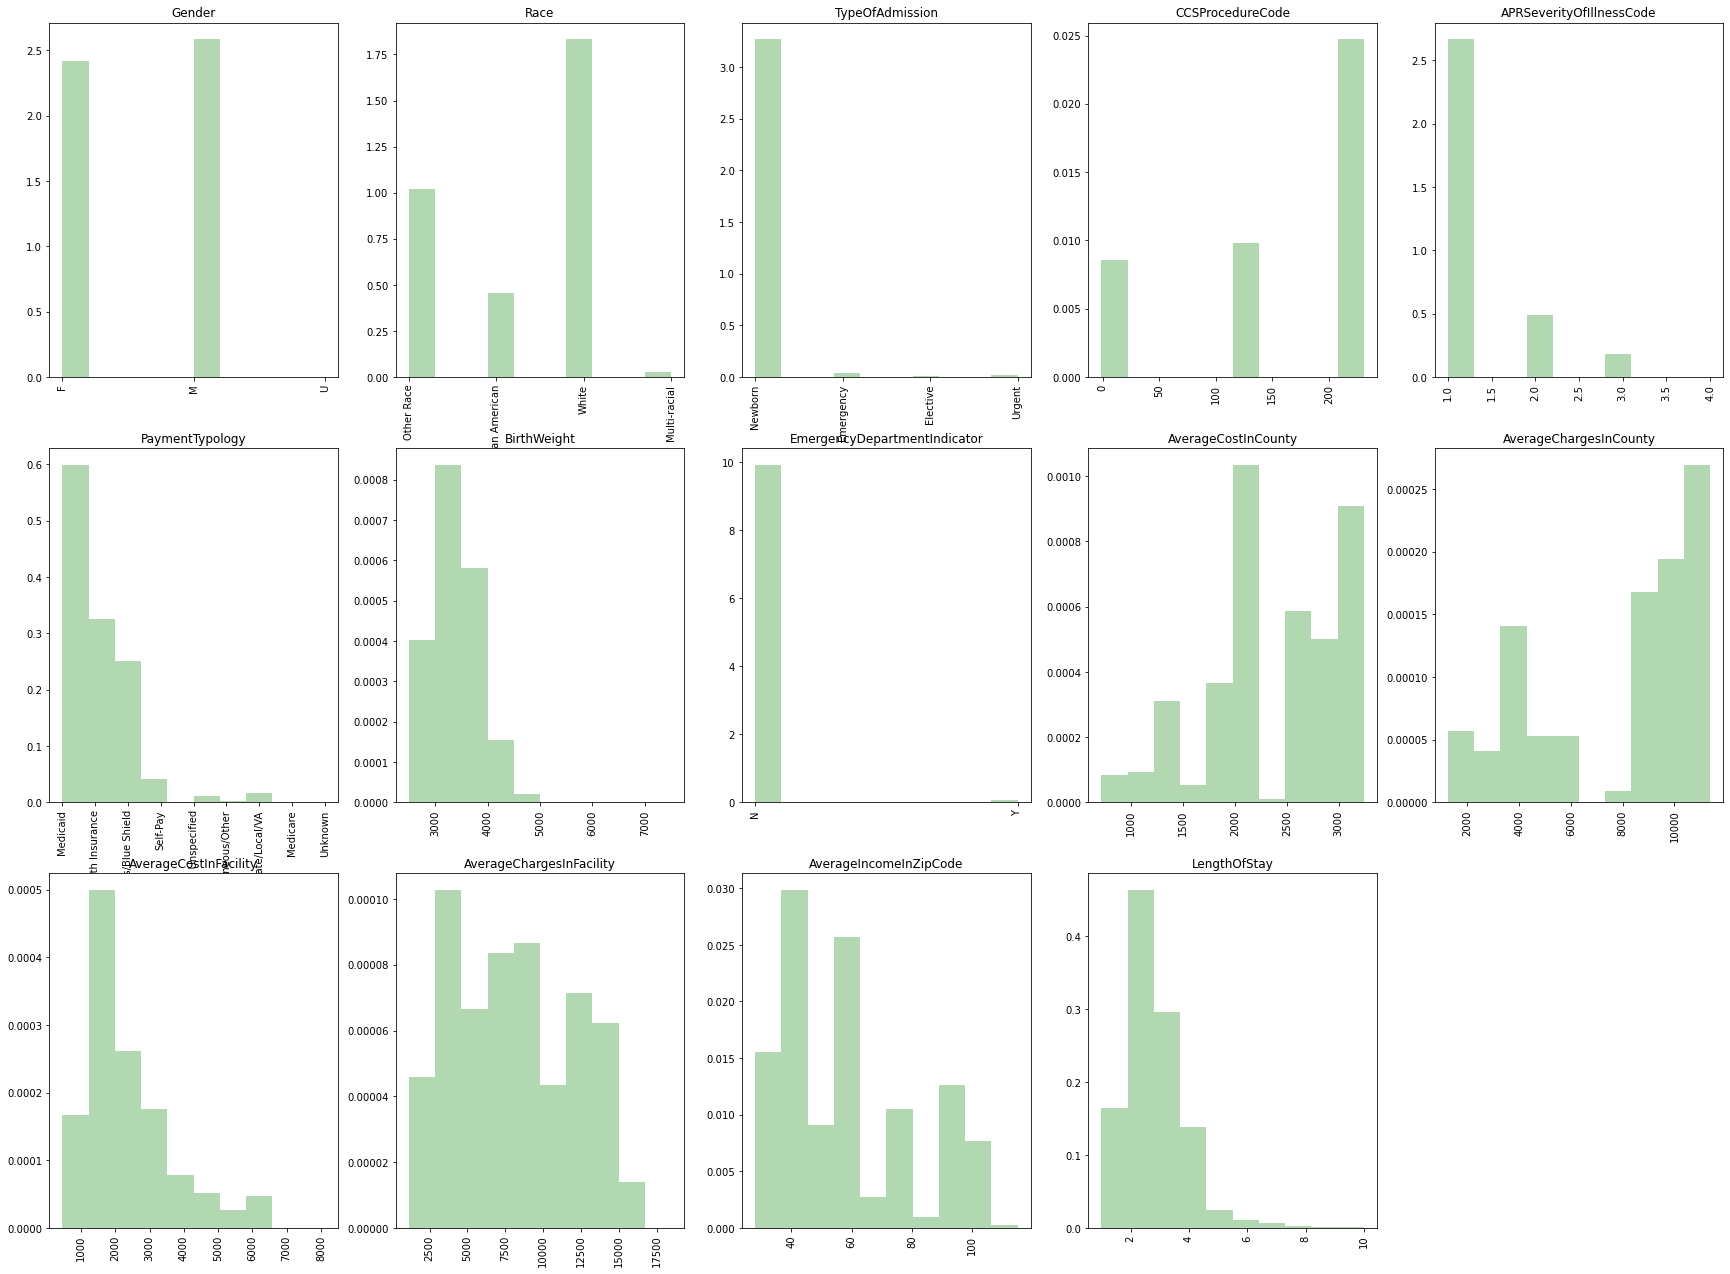

In [62]:
plt.figure(figsize=(30,30))
for i, col in enumerate(patients_df.columns):
    
    plt.subplot(4,5,i+1)
    plt.hist(patients_df[col], alpha=0.3, color='g', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')


### Scatterplot Observation:
#### None of the attributes has any linear correlation between them, as the straight line cannot come close to going through the points.

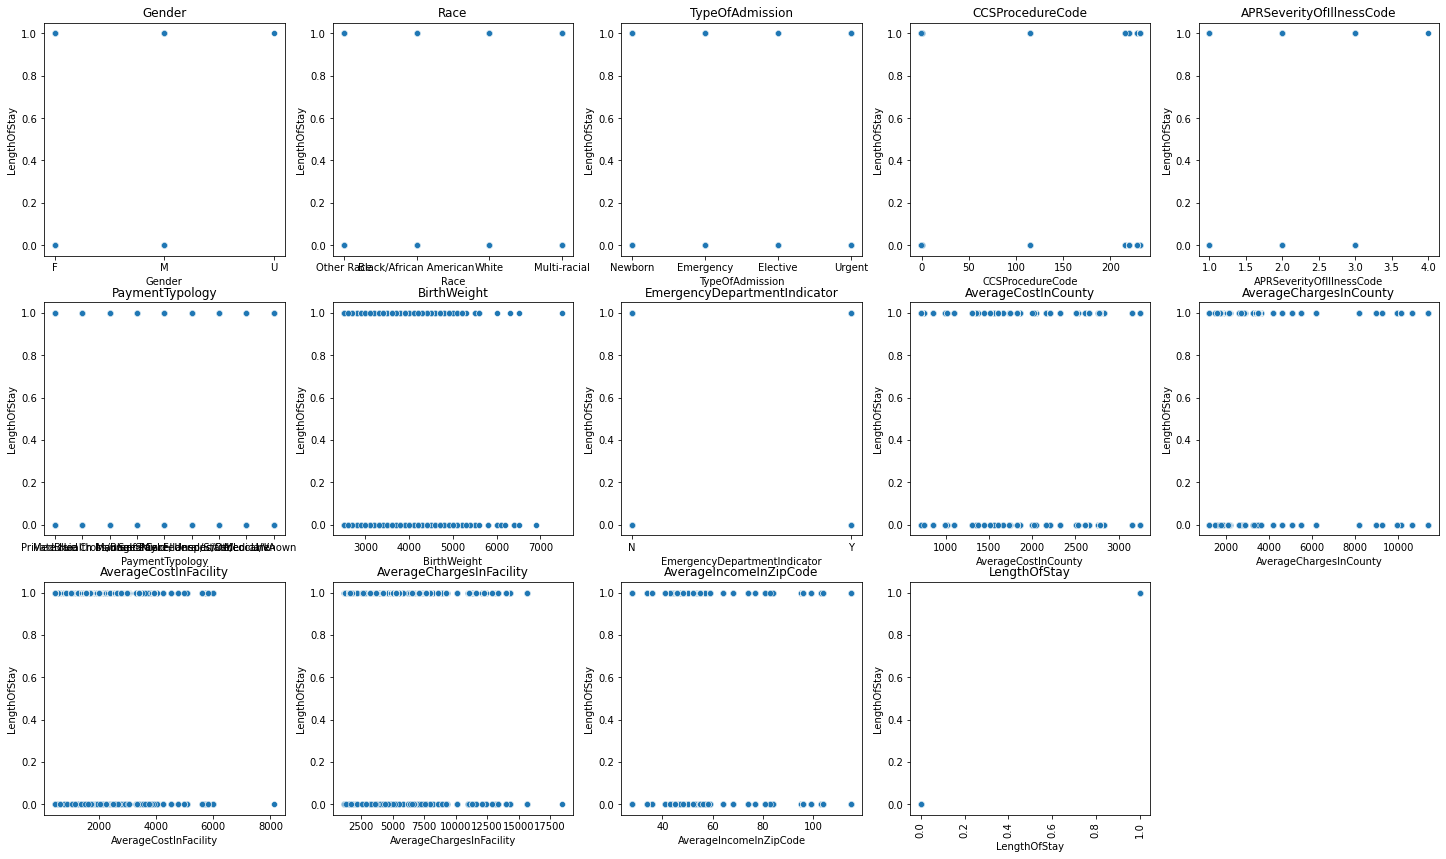

In [19]:
plt.figure(figsize=(25,30))
for i, col in enumerate(patients_df.columns):
    plt.subplot(6,5,i+1)
    sns.scatterplot(data=patients_df, x=col, y='LengthOfStay')
    # sns.regplot(x=col,y='MEDV', data=bostonHouseFrame)
    plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

### Observations from the HeatMap:
#### From the heat map it can be seen that there are some positive correlation between the features 'AverageCostInCounty, AverageChargesInCounty, AverageCostInFacility, AverageInIncomeInZipCode, APRSeverityOfIllnessCode' and 'LengthOfStay'.
#### 'BirthWeight' has negative relation with the 'LengthOfStay'.

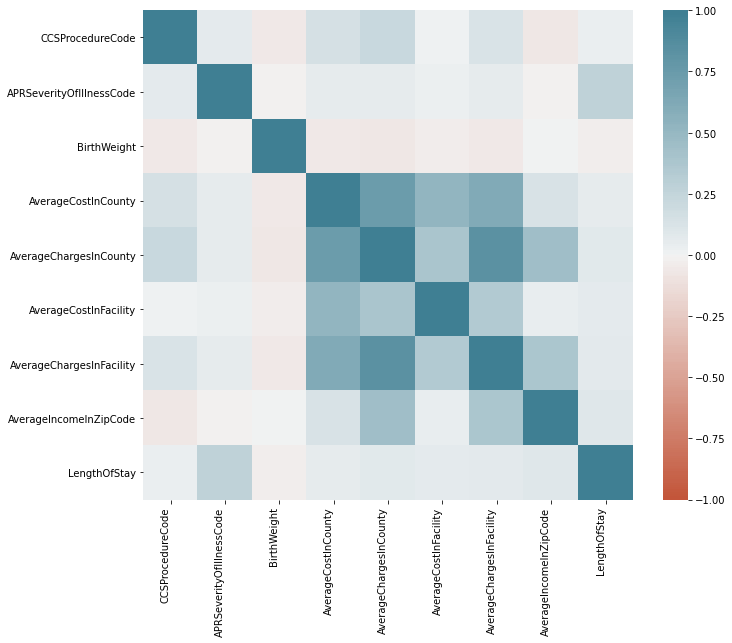

In [20]:
f, ax = plt.subplots(figsize=(11, 9))
corr = patients_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);


### Observations from BoxPlots:
* #### More than 75% of the patients are not staying in the hospital for more than 4 days, because of the charges in the facility is much higher.
* #### More than 75% Patients who're earning more income staying in the hospital for more than 4 days.

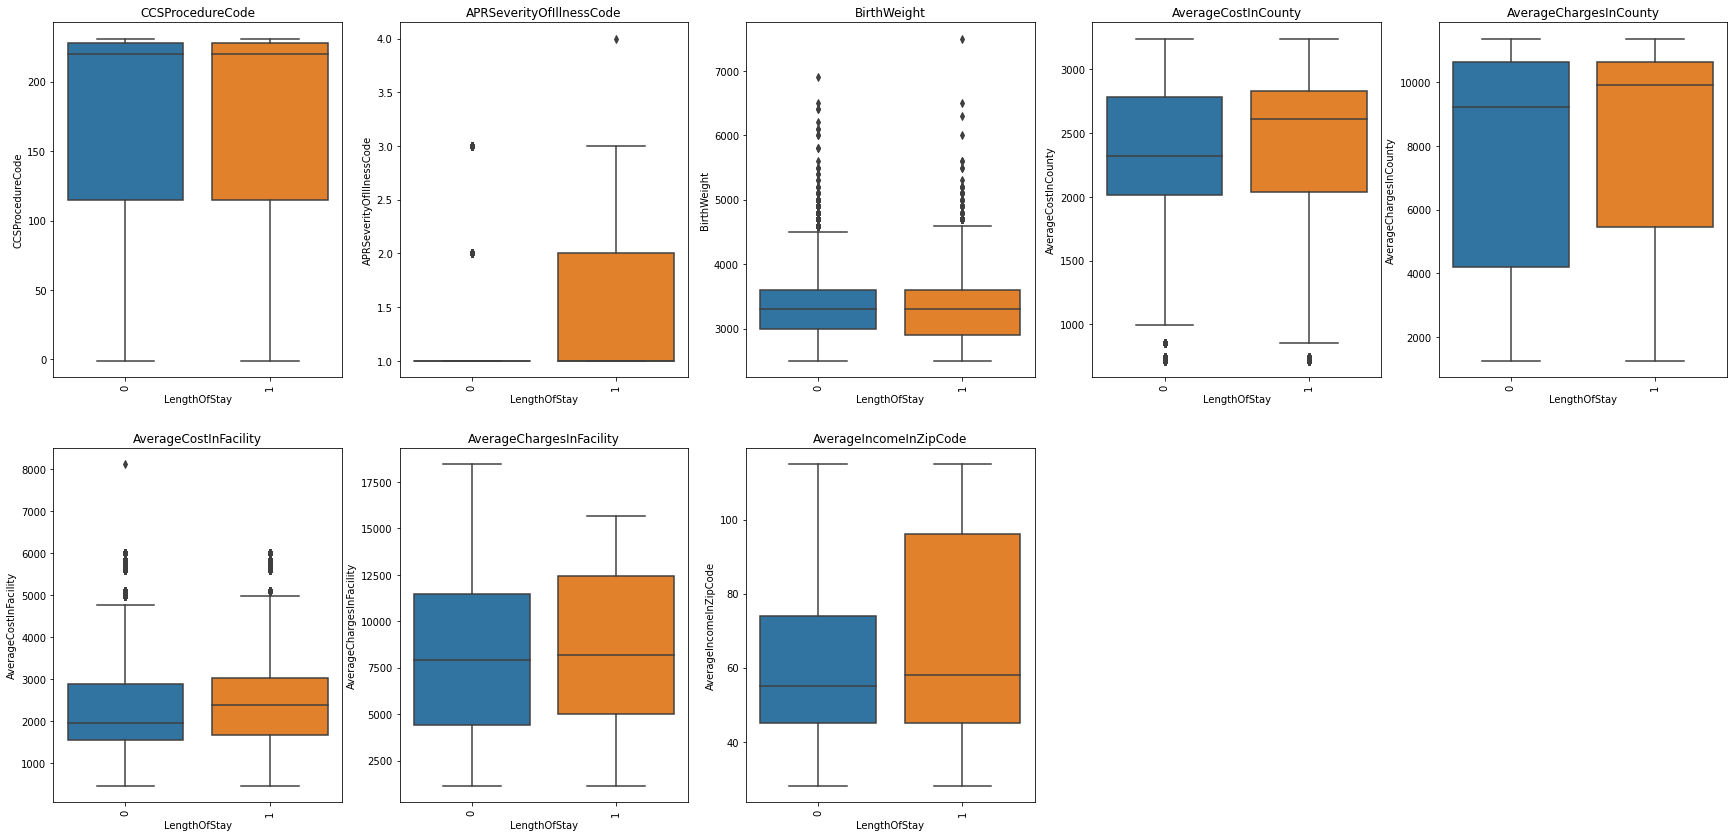

In [21]:
patients_numeric = patients_df.select_dtypes(include='int64').columns
i = 1
plt.figure(figsize=(30,30))
for col in patients_numeric:
    if col != 'LengthOfStay':
        plt.subplot(4,5,i)
        ax = sns.boxplot(y=col,x='LengthOfStay',data=patients_df)
        i = i+1
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        plt.title(col)
plt.xticks(rotation='vertical')
plt.show()

## Data Encoding:
#### Since the prediction model will not work properly on the object| datatype, hence the categorical attributes needs to be encoded and converted into integer or float datatype.
#### One hot encoding is done for the attributes with less number of categories, whereas the Label Encoding is done for the attributes with more number of categories.

### One Hot Encoding:

In [15]:
def oneHotEncoding(patients, colName):

    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder.fit(patients[[colName]])

    onehot_ = encoder.transform(patients[[colName]]).toarray()

    print(onehot_.shape, encoder.categories_)

    for i in range(len(encoder.categories_[0])):
        patients[colName + '_' + str(encoder.categories_[0][i])] = onehot_[:,i]
        
    patients.drop(columns=[colName],axis=1, inplace=True)


In [16]:
patients_encoded = patients_df.copy()

oneHotEncoding(patients_encoded, 'Gender')
oneHotEncoding(patients_encoded, 'Race')
oneHotEncoding(patients_encoded, 'EmergencyDepartmentIndicator')
oneHotEncoding(patients_encoded, 'APRSeverityOfIllnessCode')
oneHotEncoding(patients_encoded, 'CCSProcedureCode')

patients_encoded.head()


(59966, 3) [array(['F', 'M', 'U'], dtype=object)]
(59966, 4) [array(['Black/African American', 'Multi-racial', 'Other Race', 'White'],
      dtype=object)]
(59966, 2) [array(['N', 'Y'], dtype=object)]
(59966, 4) [array([1, 2, 3, 4])]
(59966, 7) [array([ -1,   0, 115, 216, 220, 228, 231])]


,TypeOfAdmission,PaymentTypology,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,APRSeverityOfIllnessCode_2,APRSeverityOfIllnessCode_3,APRSeverityOfIllnessCode_4,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231
0,Newborn,Medicaid,3700,2611,9227,1751,8951,45,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Newborn,Medicaid,2900,3242,8966,3338,6409,34,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Newborn,Private Health Insurance,3200,3155,11381,4980,9323,45,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Newborn,Private Health Insurance,3300,3155,11381,5826,15680,59,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Newborn,Medicaid,2600,2611,9227,6000,14344,59,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Label Encoding:

In [17]:
patients_object = ['TypeOfAdmission', 'PaymentTypology']
for col in patients_object:
    print(col)
    le = preprocessing.LabelEncoder()
    le.fit(patients_encoded[col])
    patients_encoded[col] = le.fit_transform(patients_encoded[col])
patients_encoded.head()

TypeOfAdmission
PaymentTypology


,TypeOfAdmission,PaymentTypology,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,APRSeverityOfIllnessCode_2,APRSeverityOfIllnessCode_3,APRSeverityOfIllnessCode_4,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231
0,2,3,3700,2611,9227,1751,8951,45,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,2900,3242,8966,3338,6409,34,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,6,3200,3155,11381,4980,9323,45,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,6,3300,3155,11381,5826,15680,59,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,3,2600,2611,9227,6000,14344,59,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


---
# Model Development Process:
## Developing a Logistic regression and Decision tree classifier model without sampling and scaling of dataset:
---

## Test-Train Split:

#### The whole dataset is splitted in to train & test datasets by using random split method.
#### Size of test dataset is 20% of the whole dataset and the rest comes under train dataset.

In [66]:
X = patients_encoded.drop(['LengthOfStay'], axis=1)
y = patients_encoded[['LengthOfStay']]
with pd.option_context('mode.chained_assignment', None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    print('X_train: '+str(X_train.shape)+'\n','X_test: '+str(X_test.shape) + '\n', 
      'y_train: '+str(y_train.shape)+'\n', 'y_test: '+str(y_test.shape))


X_train: (47972, 28)
 X_test: (11994, 28)
 y_train: (47972, 1)
 y_test: (11994, 1)


#### From the below histogram, it can be seen that the data is splitted into two partitions with 20% of test data and 80% of train data.

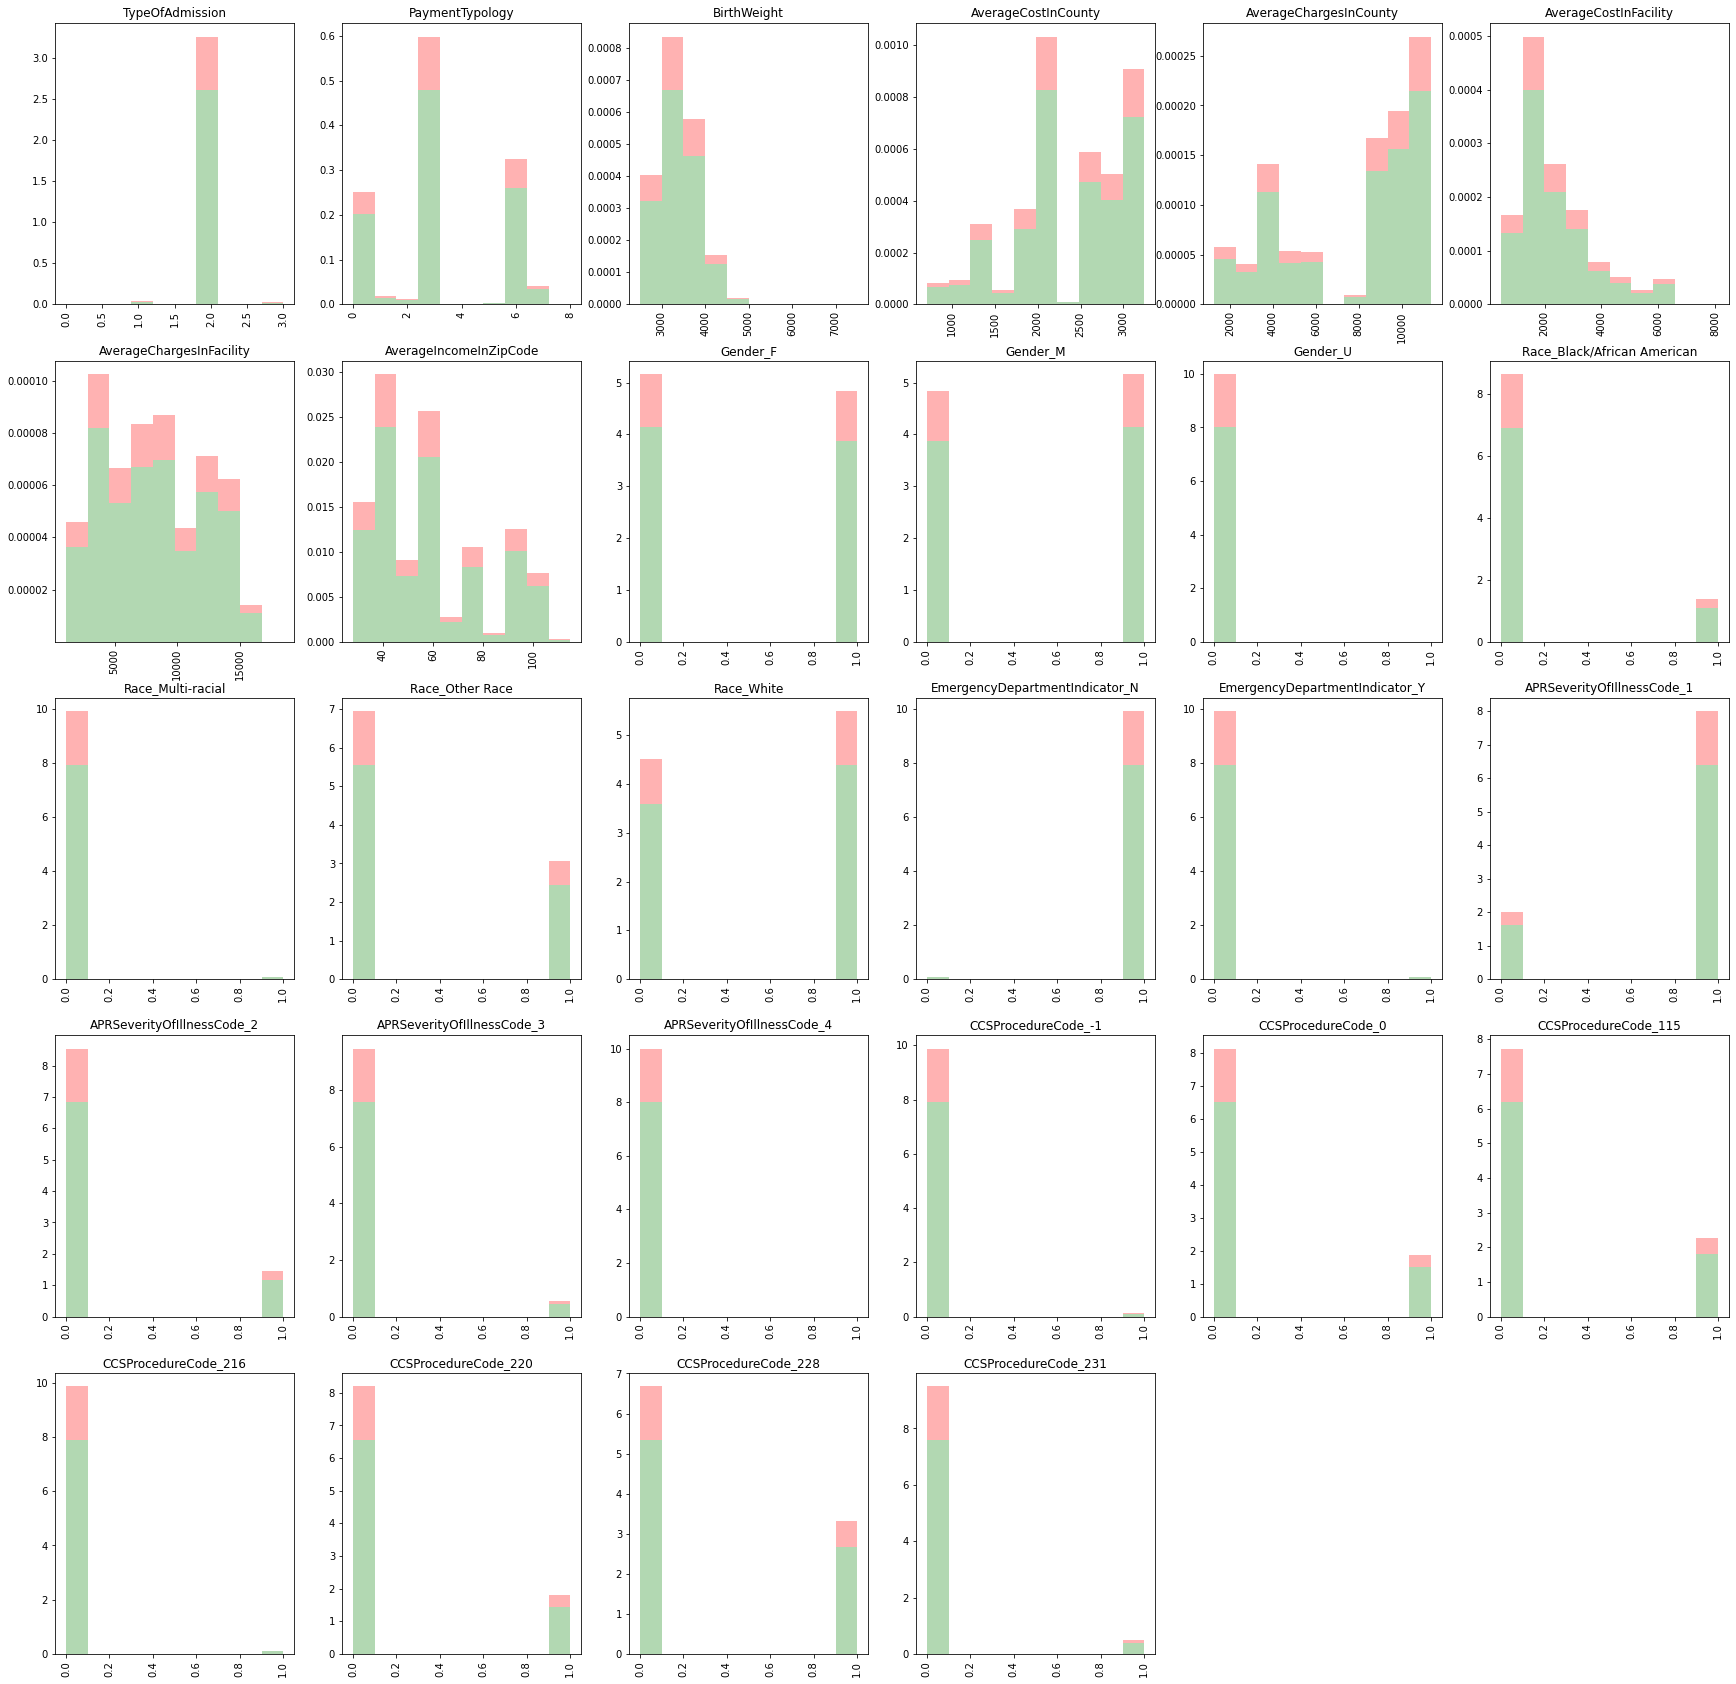

In [19]:
plt.figure(figsize=(30,30))
for i, col in enumerate(X_train.columns):
    plt.subplot(5,6,i+1)
    plt.hist([X_train[col], X_test[col]], alpha=0.3, color=['g','r'], stacked=True, density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')


### Function defintion to print Accuracy of the model:

In [76]:
def print_f1_scores(clf, X_train, y_train, X_test, y_test):
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    print("Count: ", np.unique(test_pred, return_counts=True))
    
    train_f1 = f1_score(y_train, train_pred, average='macro')
    test_f1 = f1_score(y_test, test_pred, average='macro')
    
    print("Train f1_score: {:.3f}".format(train_f1))
    print("Test f1_score: {:.3f}".format(test_f1))
    
    print(classification_report(y_test, test_pred,))

    return train_f1, test_f1

### Logistic Regression Model:
#### Function defintion for Logistic Regression model.


In [73]:
def logRegress(X_train, y_train, X_test, y_test, penalty):
    lambda_paras = np.logspace(-10, 2, num=5)

    train_performace = list()
    valid_performace = list()

    for lambda_para in lambda_paras:
        print("Lambda Param: ", lambda_para)
        clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                                 solver='liblinear', max_iter=100, 
                                 class_weight='balanced').fit(X_train, y_train.values.ravel())

        train, test = print_f1_scores(clf, X_train, y_train, X_test, y_test)
        print("")
        train_performace.append(train)
        valid_performace.append(test)

    plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
             [tp for tp in train_performace], 'r-')
    plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
             [vp for vp in valid_performace], 'b--')
    plt.xscale("log")
    plt.ylabel('F1 Score')
    plt.xlabel('Model Capacity')
    plt.legend(['Training','Testing'])
    plt.show()

#### Logistic Regresssion model is built with different lambda parameters in order to obtain different evalution results.
### Observations from the model evaluation:
* #### The best test accuracy the model obtained is 60.2% for both the penalty 'l1' & 'l2'

Lambda Param:  1e-10
Count:  (array([0, 1]), array([8301, 3693]))
Train f1_score: 0.607
Test f1_score: 0.603
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     10012
           1       0.30      0.56      0.39      1982

    accuracy                           0.71     11994
   macro avg       0.60      0.65      0.60     11994
weighted avg       0.80      0.71      0.74     11994


Lambda Param:  1e-07
Count:  (array([0, 1]), array([8317, 3677]))
Train f1_score: 0.605
Test f1_score: 0.600
              precision    recall  f1-score   support

           0       0.89      0.74      0.81     10012
           1       0.30      0.55      0.39      1982

    accuracy                           0.71     11994
   macro avg       0.60      0.65      0.60     11994
weighted avg       0.80      0.71      0.74     11994


Lambda Param:  0.0001
Count:  (array([0, 1]), array([8322, 3672]))
Train f1_score: 0.605
Test f1_score: 0.600
              pr

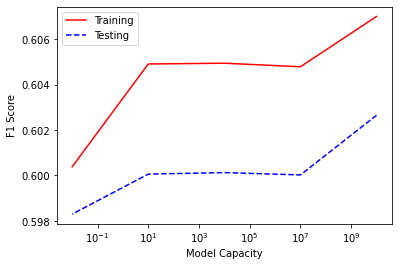

In [77]:
logRegress(X_train, y_train, X_test, y_test, 'l1')

Lambda Param:  1e-10
Count:  (array([0, 1]), array([8301, 3693]))
Train f1_score: 0.607
Test f1_score: 0.603
              precision    recall  f1-score   support

           0       0.90      0.74      0.81     10012
           1       0.30      0.56      0.39      1982

    accuracy                           0.71     11994
   macro avg       0.60      0.65      0.60     11994
weighted avg       0.80      0.71      0.74     11994


Lambda Param:  1e-07
Count:  (array([0, 1]), array([8317, 3677]))
Train f1_score: 0.605
Test f1_score: 0.600
              precision    recall  f1-score   support

           0       0.89      0.74      0.81     10012
           1       0.30      0.55      0.39      1982

    accuracy                           0.71     11994
   macro avg       0.60      0.65      0.60     11994
weighted avg       0.80      0.71      0.74     11994


Lambda Param:  0.0001
Count:  (array([0, 1]), array([8322, 3672]))
Train f1_score: 0.605
Test f1_score: 0.600
              pr

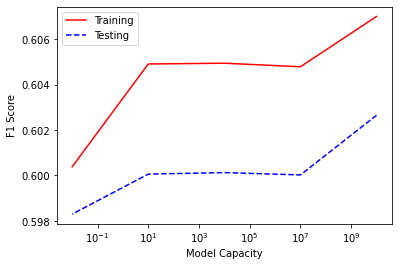

In [78]:
logRegress(X_train, y_train, X_test, y_test, 'l2')

### Function definition for Decision Tree Classification:

In [79]:
def decisionTreeDepth(X_train, y_train, X_test, y_test):
    max_depths = [2,4,5,8,10,11]

    train_hold = list()
    test_hold = list()

    for depth in max_depths:
        print("Depth: ", depth)
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
        fit = clf.fit(X_train, y_train)
        train_acc, test_acc = print_f1_scores(clf, X_train, y_train, X_test, y_test)
        train_hold.append(train_acc)
        test_hold.append(test_acc)
        print("")
        
    plt.plot(max_depths, train_hold, 'r--')
    plt.plot(max_depths, test_hold, 'b-')
    plt.legend(['Train Acc','Test Acc'])
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.show()

In [80]:
def decisionTreeLeaves(X_train, y_train, X_test, y_test, depth):
    min_samples_splits = [2,4,5,8,10,11]

    train_hold = list()
    test_hold = list()

    for min_samples_split in min_samples_splits:
        print("Min Sample Leaves: ", min_samples_split)
        clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth,
                                          min_samples_split=min_samples_split)
        fit = clf.fit(X_train, y_train)
        train_acc, test_acc = print_f1_scores(clf, X_train, y_train, X_test, y_test)
        train_hold.append(train_acc)
        test_hold.append(test_acc)
        print(" ")
        
    plt.plot(min_samples_splits, train_hold, 'r--')
    plt.plot(min_samples_splits, test_hold, 'b-')
    plt.legend(['Train Acc','Test Acc'])
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    plt.show()

#### Decision tree classifier model is built with different depth values ranging from 2 to 11, as we can see depth 8 has much better accuracy. Then another model is built with the depth 8 and with different 'min_sample_leaves' parameter, from that we can see that the best accuracy the model can get is around 61.7%

Depth:  2
Count:  (array([0, 1]), array([11408,   586]))
Train f1_score: 0.593
Test f1_score: 0.588
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10012
           1       0.58      0.17      0.26      1982

    accuracy                           0.84     11994
   macro avg       0.72      0.57      0.59     11994
weighted avg       0.81      0.84      0.80     11994


Depth:  4
Count:  (array([0, 1]), array([11391,   603]))
Train f1_score: 0.601
Test f1_score: 0.597
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10012
           1       0.60      0.18      0.28      1982

    accuracy                           0.84     11994
   macro avg       0.73      0.58      0.60     11994
weighted avg       0.82      0.84      0.81     11994


Depth:  5
Count:  (array([0, 1]), array([11635,   359]))
Train f1_score: 0.566
Test f1_score: 0.553
              precision    recall  f1-score 

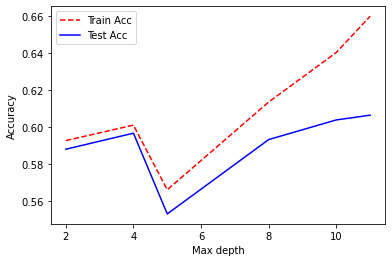

In [81]:
decisionTreeDepth(X_train, y_train, X_test, y_test)

Min Sample Leaves:  2
Count:  (array([0, 1]), array([11418,   576]))
Train f1_score: 0.614
Test f1_score: 0.593
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10012
           1       0.61      0.18      0.27      1982

    accuracy                           0.84     11994
   macro avg       0.73      0.58      0.59     11994
weighted avg       0.82      0.84      0.81     11994

 
Min Sample Leaves:  4
Count:  (array([0, 1]), array([11418,   576]))
Train f1_score: 0.613
Test f1_score: 0.593
              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10012
           1       0.61      0.18      0.27      1982

    accuracy                           0.84     11994
   macro avg       0.73      0.58      0.59     11994
weighted avg       0.82      0.84      0.81     11994

 
Min Sample Leaves:  5
Count:  (array([0, 1]), array([11419,   575]))
Train f1_score: 0.613
Test f1_score: 0.593
      

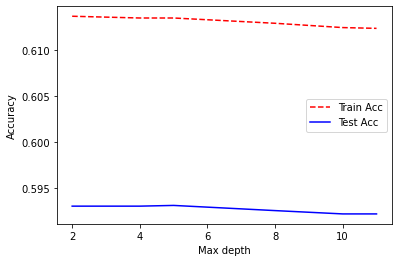

In [82]:
decisionTreeLeaves(X_train, y_train, X_test, y_test, 8)

---
# Model evaluation after data sampling:
---

#### Since the target variables are highly imbalanced, it is necessary to balance the dataset with the help of sampling technique.
### Under sampling procedure is implemented for the dataset.

In [83]:
def underSample(patients):
    min_class_len = len(patients[patients['LengthOfStay'] == 1])
    print(min_class_len)
    max_class_indices = patients[patients['LengthOfStay'] == 0].index
    print(max_class_indices)
    random_max_indices = np.random.choice(max_class_indices,
                                               min_class_len, 
                                               replace=False)
    print(len(random_max_indices))
    min_class_indices = patients[patients['LengthOfStay'] == 1].index
    print(min_class_indices)
    under_sample_indices = np.concatenate([min_class_indices,random_max_indices])
    under_sample = patients.loc[under_sample_indices]
    return under_sample

In [84]:
under_sample = underSample(patients_encoded)

10071
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            49885, 49886, 49887, 49888, 49889, 49890, 49891, 49892, 49893,
            49894],
           dtype='int64', length=49895)
10071
Int64Index([49895, 49896, 49897, 49898, 49899, 49900, 49901, 49902, 49903,
            49904,
            ...
            59956, 59957, 59958, 59959, 59960, 59961, 59962, 59963, 59964,
            59965],
           dtype='int64', length=10071)


In [85]:
X_sampled = under_sample.loc[:, patients_encoded.columns!='LengthOfStay']
y_sampled = under_sample.loc[:, patients_encoded.columns=='LengthOfStay']
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.33, random_state=42)

Lambda Param:  1e-10
Count:  (array([0, 1]), array([3916, 2731]))
Train f1_score: 0.654
Test f1_score: 0.651
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      3304
           1       0.69      0.56      0.62      3343

    accuracy                           0.65      6647
   macro avg       0.66      0.65      0.65      6647
weighted avg       0.66      0.65      0.65      6647


Lambda Param:  1e-07
Count:  (array([0, 1]), array([3961, 2686]))
Train f1_score: 0.652
Test f1_score: 0.650
              precision    recall  f1-score   support

           0       0.63      0.75      0.68      3304
           1       0.69      0.56      0.62      3343

    accuracy                           0.65      6647
   macro avg       0.66      0.65      0.65      6647
weighted avg       0.66      0.65      0.65      6647


Lambda Param:  0.0001
Count:  (array([0, 1]), array([3959, 2688]))
Train f1_score: 0.652
Test f1_score: 0.649
              pr

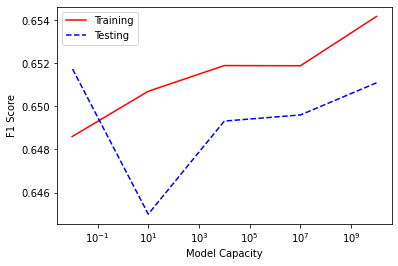

In [86]:
logRegress(X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled, 'l2')

Lambda Param:  1e-10
Count:  (array([0, 1]), array([3916, 2731]))
Train f1_score: 0.654
Test f1_score: 0.651
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      3304
           1       0.69      0.56      0.62      3343

    accuracy                           0.65      6647
   macro avg       0.66      0.65      0.65      6647
weighted avg       0.66      0.65      0.65      6647


Lambda Param:  1e-07
Count:  (array([0, 1]), array([3961, 2686]))
Train f1_score: 0.652
Test f1_score: 0.650
              precision    recall  f1-score   support

           0       0.63      0.75      0.68      3304
           1       0.69      0.56      0.62      3343

    accuracy                           0.65      6647
   macro avg       0.66      0.65      0.65      6647
weighted avg       0.66      0.65      0.65      6647


Lambda Param:  0.0001
Count:  (array([0, 1]), array([3959, 2688]))
Train f1_score: 0.652
Test f1_score: 0.649
              pr

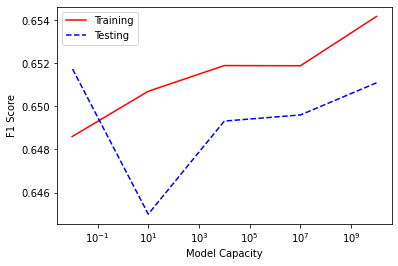

In [87]:
logRegress(X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled, 'l1')

Depth:  2
Count:  (array([0, 1]), array([2738, 3909]))
Train f1_score: 0.632
Test f1_score: 0.640
              precision    recall  f1-score   support

           0       0.67      0.55      0.61      3304
           1       0.62      0.73      0.67      3343

    accuracy                           0.64      6647
   macro avg       0.65      0.64      0.64      6647
weighted avg       0.65      0.64      0.64      6647


Depth:  4
Count:  (array([0, 1]), array([4048, 2599]))
Train f1_score: 0.664
Test f1_score: 0.666
              precision    recall  f1-score   support

           0       0.64      0.78      0.70      3304
           1       0.72      0.56      0.63      3343

    accuracy                           0.67      6647
   macro avg       0.68      0.67      0.67      6647
weighted avg       0.68      0.67      0.67      6647


Depth:  5
Count:  (array([0, 1]), array([3798, 2849]))
Train f1_score: 0.676
Test f1_score: 0.680
              precision    recall  f1-score   supp

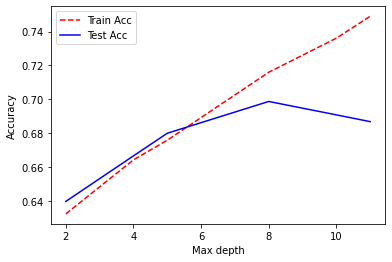

In [88]:
decisionTreeDepth(X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled)

Min Sample Leaves:  2
Count:  (array([0, 1]), array([3364, 3283]))
Train f1_score: 0.716
Test f1_score: 0.699
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      3304
           1       0.70      0.69      0.70      3343

    accuracy                           0.70      6647
   macro avg       0.70      0.70      0.70      6647
weighted avg       0.70      0.70      0.70      6647

 
Min Sample Leaves:  4
Count:  (array([0, 1]), array([3377, 3270]))
Train f1_score: 0.716
Test f1_score: 0.697
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      3304
           1       0.70      0.69      0.69      3343

    accuracy                           0.70      6647
   macro avg       0.70      0.70      0.70      6647
weighted avg       0.70      0.70      0.70      6647

 
Min Sample Leaves:  5
Count:  (array([0, 1]), array([3379, 3268]))
Train f1_score: 0.715
Test f1_score: 0.697
            

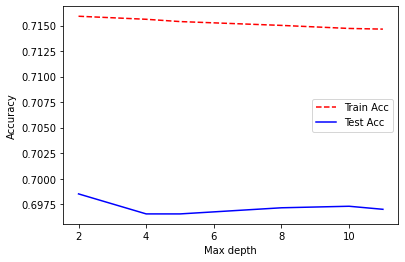

In [89]:
decisionTreeLeaves(X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled, 8)

---
# Model evaluation after data Scaling:
---

### Since most of the features ranges are higher, normalization of data needs to be done. Data scaling is done for the attributes with higher ranges (for example greater than 1000).
### Data sampling techinque used are MinMaxScaler and PowerTransformer.

In [90]:
patients_scaled = patients_encoded.copy()

patients_numeric = ['BirthWeight', 'AverageCostInCounty', 'AverageChargesInCounty', 
                    'AverageCostInFacility', 'AverageChargesInFacility']
for col in patients_numeric:
        scaler = MinMaxScaler().fit(patients_scaled[[col]])
        patients_scaled[[col]] = scaler.transform(patients_scaled[[col]])
        powerTransform = PowerTransformer(method='yeo-johnson', standardize=False).fit(patients_scaled[[col]])
        patients_scaled[[col]] = powerTransform.transform(patients_scaled[[col]])
patients_scaled


,TypeOfAdmission,PaymentTypology,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,APRSeverityOfIllnessCode_2,APRSeverityOfIllnessCode_3,APRSeverityOfIllnessCode_4,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231
0,2,3,0.190959,1.123804,1.686381,0.121024,0.389048,45,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,0.073709,1.672674,1.595924,0.194436,0.274475,34,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,6,0.121788,1.591537,2.548237,0.232822,0.405059,45,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,6,0.136640,1.591537,2.548237,0.245119,0.654351,59,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,3,0.019583,1.123804,1.686381,0.247233,0.605362,59,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,2,0,0.178090,0.566098,0.394067,0.107241,0.141682,36,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59962,2,0,0.136640,0.566098,0.394067,0.107241,0.141682,55,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59963,2,0,0.150956,0.566098,0.394067,0.107241,0.141682,55,1,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59964,2,3,0.106371,0.566098,0.394067,0.107241,0.141682,55,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


X_train: (47972, 28)
 X_test: (11994, 28)
 y_train: (47972, 1)
 y_test: (11994, 1)


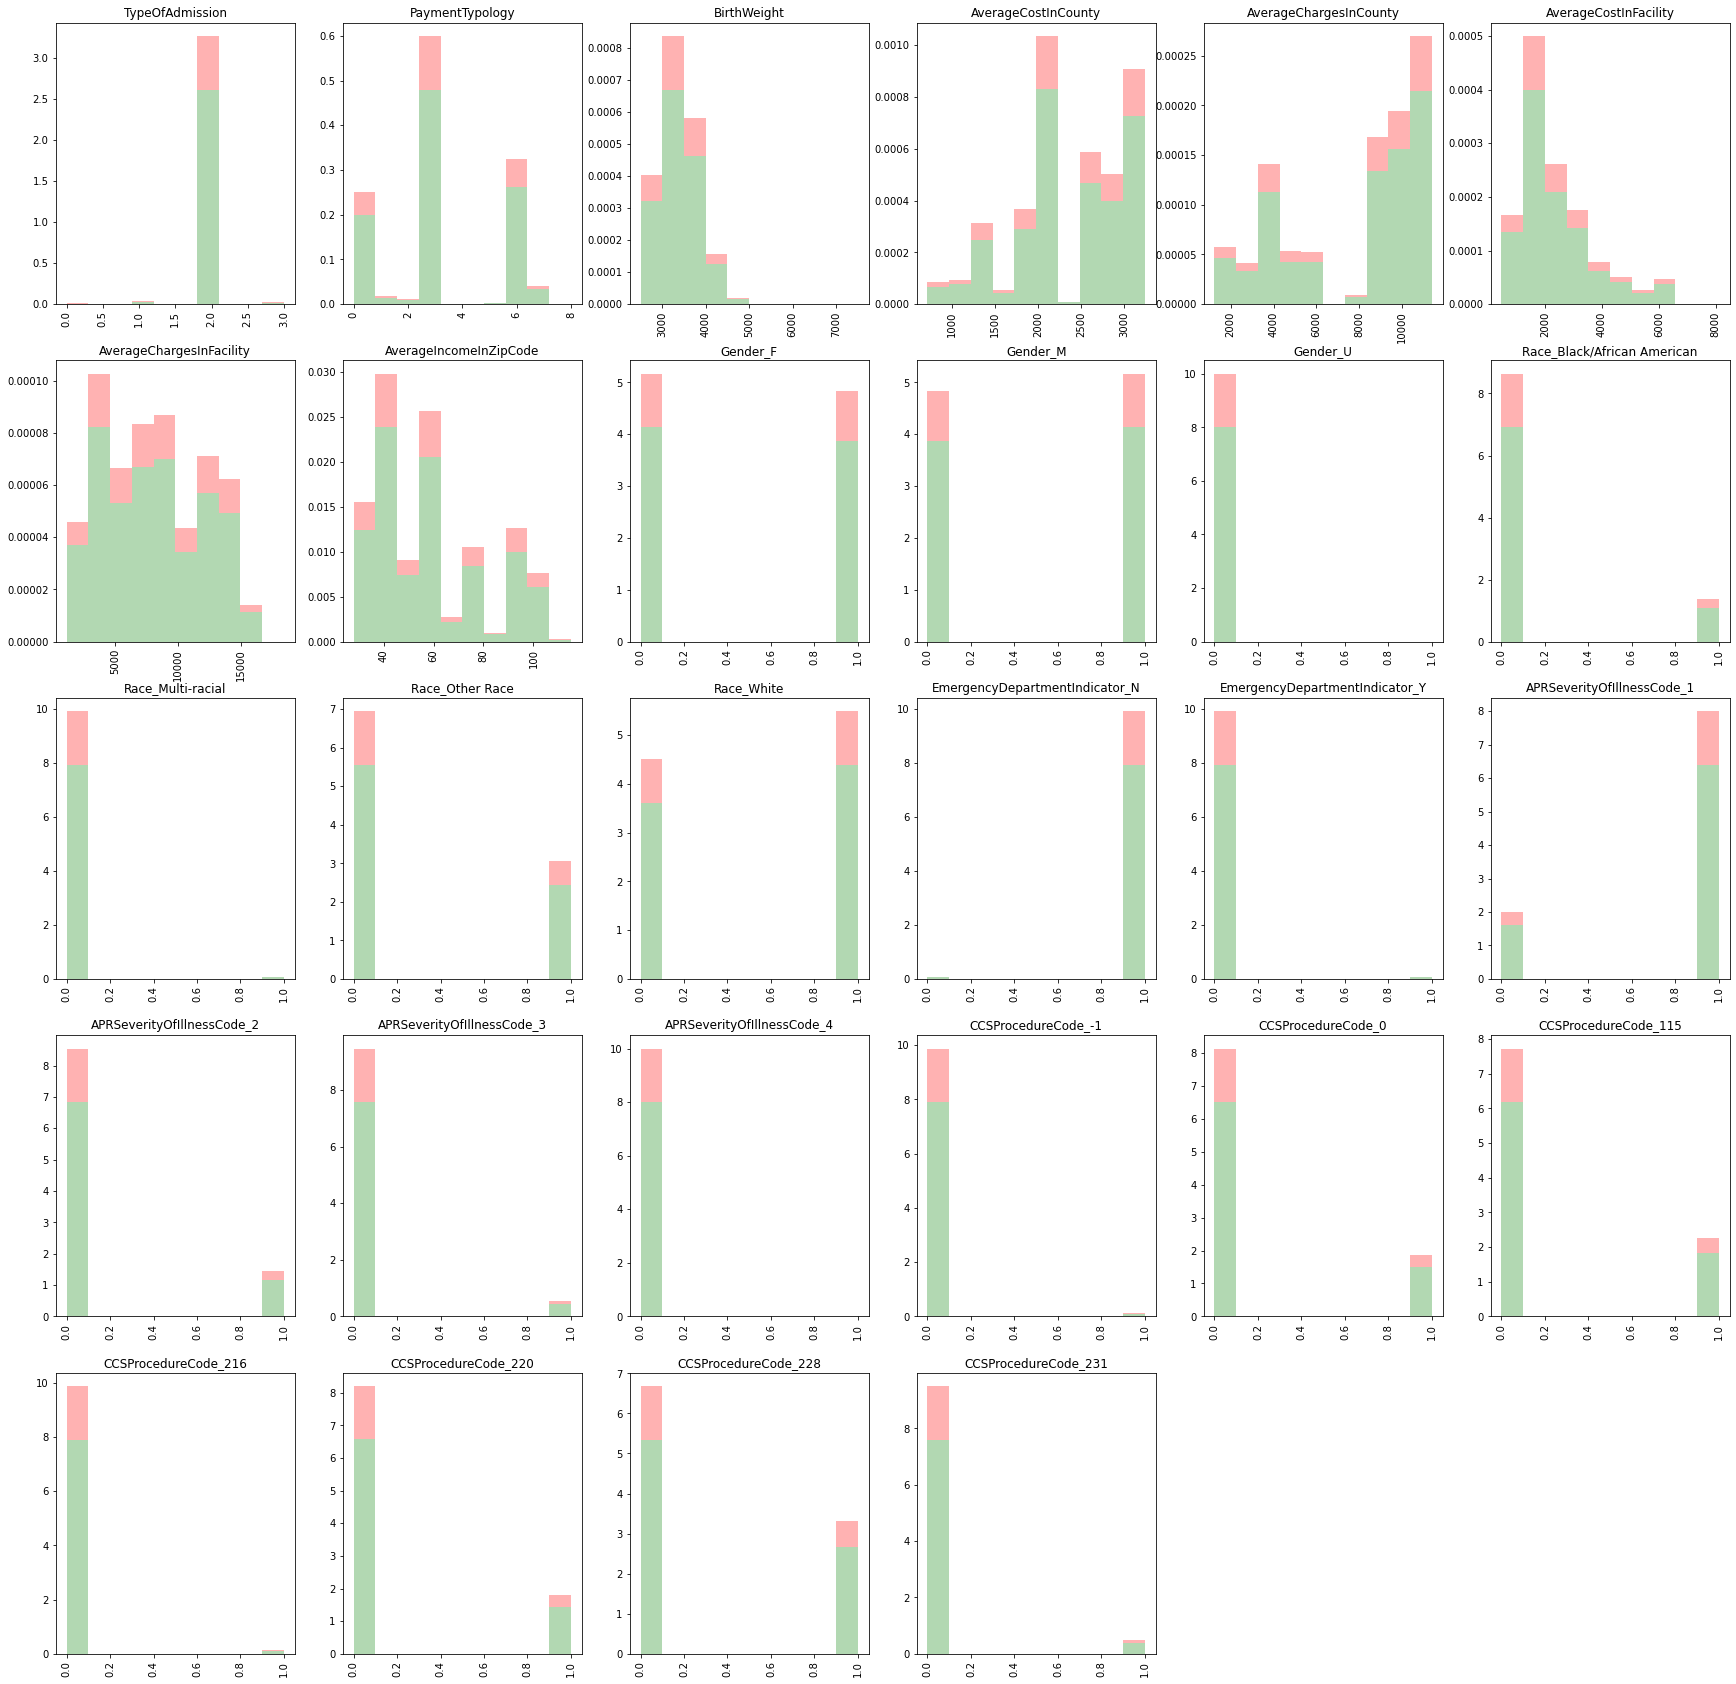

In [91]:
X_scaled = patients_scaled.drop(['LengthOfStay'], axis=1)
y_scaled = patients_scaled[['LengthOfStay']]
with pd.option_context('mode.chained_assignment', None):
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
    print('X_train: '+str(X_train_scaled.shape)+'\n','X_test: '+str(X_test_scaled.shape) + '\n', 
      'y_train: '+str(y_train_scaled.shape)+'\n', 'y_test: '+str(y_test_scaled.shape))

plt.figure(figsize=(30,30))
for i, col in enumerate(X_train_scaled.columns):
    
    plt.subplot(5,6,i+1)
    plt.hist([X_train_scaled[col], X_test_scaled[col]], alpha=0.3, color=['g','r'], stacked=True, density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')


Lambda Param:  1e-10
Count:  (array([0, 1]), array([8215, 3779]))
Train f1_score: 0.603
Test f1_score: 0.608
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      9943
           1       0.31      0.58      0.41      2051

    accuracy                           0.71     11994
   macro avg       0.60      0.66      0.61     11994
weighted avg       0.80      0.71      0.74     11994


Lambda Param:  1e-07
Count:  (array([0, 1]), array([8247, 3747]))
Train f1_score: 0.603
Test f1_score: 0.607
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      9943
           1       0.31      0.57      0.40      2051

    accuracy                           0.71     11994
   macro avg       0.60      0.66      0.61     11994
weighted avg       0.79      0.71      0.74     11994


Lambda Param:  0.0001
Count:  (array([0, 1]), array([8224, 3770]))
Train f1_score: 0.604
Test f1_score: 0.607
              pr

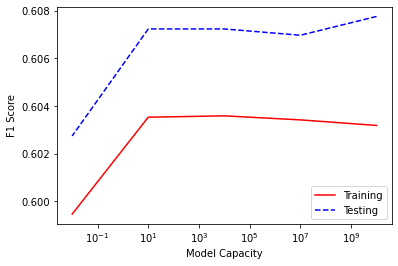

In [92]:
logRegress(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, 'l2')

Lambda Param:  1e-10
Count:  (array([0, 1]), array([8215, 3779]))
Train f1_score: 0.603
Test f1_score: 0.608
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      9943
           1       0.31      0.58      0.41      2051

    accuracy                           0.71     11994
   macro avg       0.60      0.66      0.61     11994
weighted avg       0.80      0.71      0.74     11994


Lambda Param:  1e-07
Count:  (array([0, 1]), array([8247, 3747]))
Train f1_score: 0.603
Test f1_score: 0.607
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      9943
           1       0.31      0.57      0.40      2051

    accuracy                           0.71     11994
   macro avg       0.60      0.66      0.61     11994
weighted avg       0.79      0.71      0.74     11994


Lambda Param:  0.0001
Count:  (array([0, 1]), array([8224, 3770]))
Train f1_score: 0.604
Test f1_score: 0.607
              pr

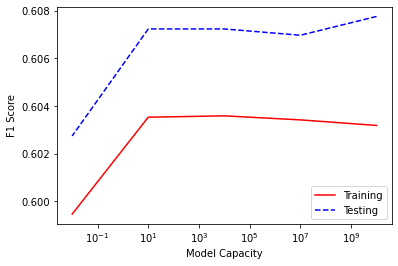

In [93]:
logRegress(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, 'l1')

Depth:  2
Count:  (array([0, 1]), array([11352,   642]))
Train f1_score: 0.593
Test f1_score: 0.587
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      9943
           1       0.56      0.18      0.27      2051

    accuracy                           0.84     11994
   macro avg       0.71      0.57      0.59     11994
weighted avg       0.80      0.84      0.80     11994


Depth:  4
Count:  (array([0, 1]), array([11314,   680]))
Train f1_score: 0.601
Test f1_score: 0.598
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      9943
           1       0.58      0.19      0.29      2051

    accuracy                           0.84     11994
   macro avg       0.72      0.58      0.60     11994
weighted avg       0.81      0.84      0.80     11994


Depth:  5
Count:  (array([0, 1]), array([11631,   363]))
Train f1_score: 0.553
Test f1_score: 0.551
              precision    recall  f1-score 

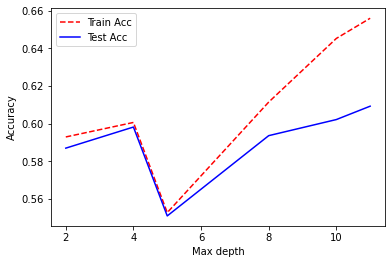

In [94]:
decisionTreeDepth(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

Min Sample Leaves:  2
Count:  (array([0, 1]), array([11221,   773]))
Train f1_score: 0.656
Test f1_score: 0.609
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9943
           1       0.57      0.21      0.31      2051

    accuracy                           0.84     11994
   macro avg       0.71      0.59      0.61     11994
weighted avg       0.81      0.84      0.81     11994

 
Min Sample Leaves:  4
Count:  (array([0, 1]), array([11224,   770]))
Train f1_score: 0.655
Test f1_score: 0.611
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      9943
           1       0.57      0.22      0.31      2051

    accuracy                           0.84     11994
   macro avg       0.71      0.59      0.61     11994
weighted avg       0.81      0.84      0.81     11994

 
Min Sample Leaves:  5
Count:  (array([0, 1]), array([11222,   772]))
Train f1_score: 0.655
Test f1_score: 0.609
      

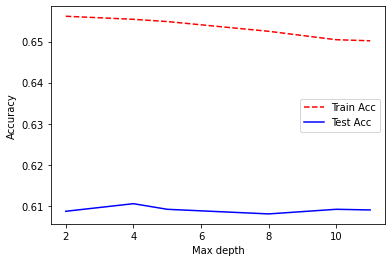

In [95]:
decisionTreeLeaves(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, 11)

---
# Model evaluation after data Sampling & Scaling:
---

In [96]:
under_sample = underSample(patients_scaled)

10071
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            49885, 49886, 49887, 49888, 49889, 49890, 49891, 49892, 49893,
            49894],
           dtype='int64', length=49895)
10071
Int64Index([49895, 49896, 49897, 49898, 49899, 49900, 49901, 49902, 49903,
            49904,
            ...
            59956, 59957, 59958, 59959, 59960, 59961, 59962, 59963, 59964,
            59965],
           dtype='int64', length=10071)


In [97]:
X_sampled = under_sample.loc[:, patients_scaled.columns!='LengthOfStay']
y_sampled = under_sample.loc[:, patients_scaled.columns=='LengthOfStay']
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled, y_sampled, test_size=0.33, random_state=42)

Lambda Param:  1e-10
Count:  (array([0, 1]), array([3961, 2686]))
Train f1_score: 0.652
Test f1_score: 0.643
              precision    recall  f1-score   support

           0       0.62      0.74      0.68      3304
           1       0.68      0.55      0.61      3343

    accuracy                           0.65      6647
   macro avg       0.65      0.65      0.64      6647
weighted avg       0.65      0.65      0.64      6647


Lambda Param:  1e-07
Count:  (array([0, 1]), array([3960, 2687]))
Train f1_score: 0.652
Test f1_score: 0.643
              precision    recall  f1-score   support

           0       0.62      0.74      0.68      3304
           1       0.68      0.55      0.61      3343

    accuracy                           0.65      6647
   macro avg       0.65      0.65      0.64      6647
weighted avg       0.65      0.65      0.64      6647


Lambda Param:  0.0001
Count:  (array([0, 1]), array([3961, 2686]))
Train f1_score: 0.652
Test f1_score: 0.643
              pr

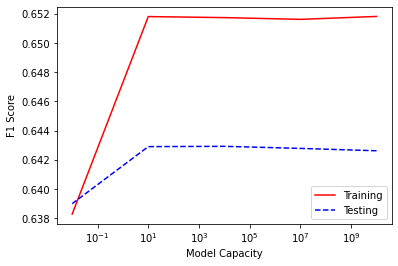

In [98]:
logRegress(X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled, 'l2')

Lambda Param:  1e-10
Count:  (array([0, 1]), array([3961, 2686]))
Train f1_score: 0.652
Test f1_score: 0.643
              precision    recall  f1-score   support

           0       0.62      0.74      0.68      3304
           1       0.68      0.55      0.61      3343

    accuracy                           0.65      6647
   macro avg       0.65      0.65      0.64      6647
weighted avg       0.65      0.65      0.64      6647


Lambda Param:  1e-07
Count:  (array([0, 1]), array([3960, 2687]))
Train f1_score: 0.652
Test f1_score: 0.643
              precision    recall  f1-score   support

           0       0.62      0.74      0.68      3304
           1       0.68      0.55      0.61      3343

    accuracy                           0.65      6647
   macro avg       0.65      0.65      0.64      6647
weighted avg       0.65      0.65      0.64      6647


Lambda Param:  0.0001
Count:  (array([0, 1]), array([3961, 2686]))
Train f1_score: 0.652
Test f1_score: 0.643
              pr

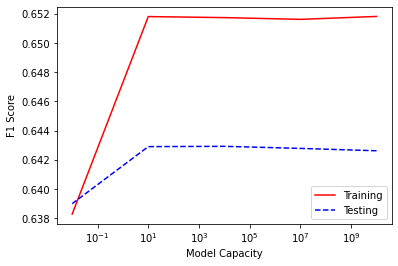

In [99]:
logRegress(X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled, 'l1')

Depth:  2
Count:  (array([0, 1]), array([2669, 3978]))
Train f1_score: 0.631
Test f1_score: 0.628
              precision    recall  f1-score   support

           0       0.66      0.53      0.59      3304
           1       0.61      0.73      0.67      3343

    accuracy                           0.63      6647
   macro avg       0.64      0.63      0.63      6647
weighted avg       0.64      0.63      0.63      6647


Depth:  4
Count:  (array([0, 1]), array([3282, 3365]))
Train f1_score: 0.672
Test f1_score: 0.671
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      3304
           1       0.67      0.68      0.67      3343

    accuracy                           0.67      6647
   macro avg       0.67      0.67      0.67      6647
weighted avg       0.67      0.67      0.67      6647


Depth:  5
Count:  (array([0, 1]), array([3813, 2834]))
Train f1_score: 0.683
Test f1_score: 0.681
              precision    recall  f1-score   supp

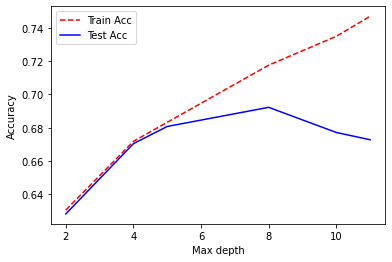

In [100]:
decisionTreeDepth(X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled)

Min Sample Leaves:  2
Count:  (array([0, 1]), array([3251, 3396]))
Train f1_score: 0.718
Test f1_score: 0.693
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      3304
           1       0.69      0.70      0.70      3343

    accuracy                           0.69      6647
   macro avg       0.69      0.69      0.69      6647
weighted avg       0.69      0.69      0.69      6647

 
Min Sample Leaves:  4
Count:  (array([0, 1]), array([3253, 3394]))
Train f1_score: 0.717
Test f1_score: 0.693
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      3304
           1       0.69      0.70      0.70      3343

    accuracy                           0.69      6647
   macro avg       0.69      0.69      0.69      6647
weighted avg       0.69      0.69      0.69      6647

 
Min Sample Leaves:  5
Count:  (array([0, 1]), array([3251, 3396]))
Train f1_score: 0.717
Test f1_score: 0.692
            

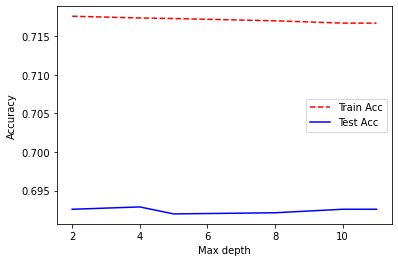

In [101]:
decisionTreeLeaves(X_train_sampled, y_train_sampled, X_test_sampled, y_test_sampled, 8)

---
# Final Decision
---
#### From all the evaluation procedures, it is found that the desicion tree classifier with depth 8 is the best model for this problem. Since the accuracy for this model is around 69.6%.

In [102]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=8)
fit = clf.fit(X_train_sampled, y_train_sampled)

---
# Evaluating the model with Test data
---
#### Since decision tree classifier is the best model for this problem, all the preprocessing done for that model needs to be processed for the test data as well. Then the data will be predicted with already fitted model.

In [24]:
patients_test = pd.read_csv('test_data.csv', sep=',', squeeze=True, encoding='ISO-8859-1', keep_default_na =True)
patients_test.drop(['ID', 'HealthServiceArea'], axis=1, inplace=True)
patients_test.head(5)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45
4,F,Other Race,Newborn,220,2,Medicaid,3800,N,3155,11381,3032,10135,59


In [25]:
patients_test['PaymentTypology'].value_counts()

Medicaid                     37037
Private Health Insurance     14871
Blue Cross/Blue Shield       12795
Self-Pay                      2508
Managed Care, Unspecified     1539
Federal/State/Local/VA         320
Medicare                        43
Miscellaneous/Other             27
Unknown                         25
Department of Corrections       12
Name: PaymentTypology, dtype: int64

In [26]:
unknownIndices = patients_test.loc[patients_test['PaymentTypology'] == 'Department of Corrections'].index
patients_test.drop(unknownIndices, inplace=True)

In [27]:
patients_test_encoded = patients_test.copy()

oneHotEncoding(patients_test_encoded, 'Gender')
oneHotEncoding(patients_test_encoded, 'Race')
oneHotEncoding(patients_test_encoded, 'EmergencyDepartmentIndicator')
oneHotEncoding(patients_test_encoded, 'APRSeverityOfIllnessCode')
oneHotEncoding(patients_test_encoded, 'CCSProcedureCode')

patients_encoded.head()

(69165, 3) [array(['F', 'M', 'U'], dtype=object)]
(69165, 4) [array(['Black/African American', 'Multi-racial', 'Other Race', 'White'],
      dtype=object)]
(69165, 2) [array(['N', 'Y'], dtype=object)]
(69165, 4) [array([1, 2, 3, 4])]
(69165, 7) [array([ -1,   0, 115, 216, 220, 228, 231])]


,TypeOfAdmission,PaymentTypology,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,APRSeverityOfIllnessCode_2,APRSeverityOfIllnessCode_3,APRSeverityOfIllnessCode_4,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231
0,2,3,3700,2611,9227,1751,8951,45,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,2900,3242,8966,3338,6409,34,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,6,3200,3155,11381,4980,9323,45,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,6,3300,3155,11381,5826,15680,59,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,3,2600,2611,9227,6000,14344,59,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
patients_object = ['TypeOfAdmission', 'PaymentTypology']
for col in patients_object:
    print(col)
    le = preprocessing.LabelEncoder()
    le.fit(patients_test_encoded[col])
    patients_test_encoded[col] = le.fit_transform(patients_test_encoded[col])
patients_encoded.head()


TypeOfAdmission
PaymentTypology


,TypeOfAdmission,PaymentTypology,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,APRSeverityOfIllnessCode_2,APRSeverityOfIllnessCode_3,APRSeverityOfIllnessCode_4,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231
0,2,3,3700,2611,9227,1751,8951,45,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,3,2900,3242,8966,3338,6409,34,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,6,3200,3155,11381,4980,9323,45,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,6,3300,3155,11381,5826,15680,59,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,3,2600,2611,9227,6000,14344,59,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
patients_scaled_test = patients_test_encoded.copy()

patients_numeric = ['BirthWeight', 'AverageCostInCounty', 'AverageChargesInCounty', 
                    'AverageCostInFacility', 'AverageChargesInFacility']
for col in patients_numeric:
        scaler = MinMaxScaler().fit(patients_scaled_test[[col]])
        patients_scaled_test[[col]] = scaler.transform(patients_scaled_test[[col]])
        powerTransform = PowerTransformer(method='yeo-johnson', standardize=False).fit(patients_scaled_test[[col]])
        patients_scaled_test[[col]] = powerTransform.transform(patients_scaled_test[[col]])
patients_scaled_test


,TypeOfAdmission,PaymentTypology,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,Gender_F,Gender_M,...,APRSeverityOfIllnessCode_2,APRSeverityOfIllnessCode_3,APRSeverityOfIllnessCode_4,CCSProcedureCode_-1,CCSProcedureCode_0,CCSProcedureCode_115,CCSProcedureCode_216,CCSProcedureCode_220,CCSProcedureCode_228,CCSProcedureCode_231
0,2,3,0.240906,1.065478,1.250788,0.191640,0.369209,34,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,3,0.081726,0.775092,1.314279,0.136020,0.267641,45,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,3,0.104903,1.024290,1.895207,0.059920,0.327346,74,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,3,0.104903,0.775092,1.314279,0.263668,0.187195,45,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,3,0.155778,1.024290,1.895207,0.227484,0.298648,59,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69172,2,3,0.126384,1.250074,0.858123,0.308396,0.525738,49,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
69173,2,3,0.069444,1.250074,0.858123,0.308396,0.525738,115,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
69174,2,3,0.115845,1.250074,0.858123,0.308396,0.525738,83,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
69175,2,3,0.056665,1.250074,0.858123,0.308396,0.525738,81,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [46]:
predicts = fit.predict(patients_scaled_test)

In [47]:
import csv

with open('./s3835901_predictions.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['ID', 'LengthOfStay'])
    
    for i,value in enumerate(predicts):
        filewriter.writerow([i+1, value])